# Test 01 (Midterm Exam): Scikit-Learn, Classification, Regression

Please answer the following questions using Python and/or written responses in the notebook
cells below.  This tests covers the materials we have looked at so far in this class, including
Python and the scientific python stack, supervised learning for classification and regression
problems, using the scikit-learn ML library framework, and linear and logistic regression.
You should fill out the cells to answer the questions, and submit your working notebook
to the correct submission folder in MyLeoOnline before the deadline for this test.
Please make sure that your notebook runs all cells cleanly form top to bottom when a run
all is performed.  Please ensure you use markdown cells for any written responses you are
asked to submit for this test.

**Due: Saturday 10/17/2020 (by midnight)**

Please add your name and the last 5 digits of your CWID here for my reference and in case a notebook
gets accidently misplaced or copied while grading.

Name: Thomas Grasty

CWID-5: 73250

In the following cells, we import some common libraries, including a few from the scikit-learn
framework, and set some plotting and visualization defaults.  However, you may need to add in additional
imports to your notebook for your work on the questions for this test.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# By convention, we often just import the specific classes/functions
# from scikit-learn we will need to train a model and perform prediction.
# Here we include all of the classes and functions you should need for this
# assignment from the sklearn library, but there could be other methods you might
# want to try or would be useful to the way you approach the problem, so feel free
# to import others you might need or want to try
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from numpy import random
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [34]:
# notebook wide settings to make plots more readable and visually better to understand
np.set_printoptions(suppress=True)
plt.style.use('seaborn-darkgrid')
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('figure', titlesize=24)
plt.rc('legend', fontsize=14)
plt.rcParams['figure.figsize'] = (12.0, 8.0) # default figure size if not specified in plot


## Question 1: Linear Regression on Cubic Function
------------------------

For the first part of this exam you will be performing a linear regression on an artificial data set.  
You will start by creating a function that generates an artificial data set that is really a cubic function,
but that also adds in noise to each data point to make it more difficult to fit a machine learning model
to the artificially generated data set.  

In the [scikit-learn generators](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)
library there are many functions to generate artificial data sets, including one to make a random
regression data set.  You should not use this, as in this test you are to write your own data
set generator as described next.

This function will generate data using a polynomial of the form

\begin{equation}
y = ax^3 + bx^2 +cx + d + \text{gaussian_noise(mu, sigma)}
\end{equation}

where $a, b, c, d$ are all parameters of the polynomial.  You should use the `numpy.random.normal` function
to add noise with a mean of mu and standard deviation of sigma to each generated data point.

Write a function named `make_cubic_dataset()`.  The function signature is given below, you just need
to write it.  The function takes only 1 required parameter, `m`, which is the number of random
samples to generate.  Parameters a, b, c and d specify the cubic polynomial function, and defaults are
given for an interesting function in the range of $x$ from -1.0 to 1.0.  Also mu and sigma are parameters
that control the amount of noise added to the randomly created data, where mu is 0, but we add 
a standard deviation of 0.33 of gaussian noise to each generated sample point.

Your function should return two `NumPy` arrays named `x` and `y`.  `x` is simply an array with `m` values
in it, which are randomly selected values in the range from -1.0 to 1.0.  `y` then is the result
of applying the cubic function to each value of x, and then adding in the indicated random amount
of gaussian noise.  
Your
To generate random `x` values, use the `numpy.random.rand()` function, which will return values in the
range [0.0, 1.0] and simply multiply by 2 and subtract 1 (vectorized), to get values in the range
[-1.0, 1.0].  Once you have your `x` values, you can use vectorized operations to generate y using the cubic polynomial.
Don't forget to add in the indicated noise as well.  For `numpy.random.normal()` you can use the location
and scale parameters to specify the mean and standard deviation of the noise, and you also want to use the
size parameter so that you can generate `m` samples of random noise to add to the artificial data.

You have been given the function signature below.  Default values are given for the cubic polynomial that
you will use for this test question are:

\begin{equation}
y = -3x^3 + 1x^2 + 3.5x + 4
\end{equation}

And likewise you should use a default `mu` of 0.0 and `sigma` of 0.33 to generate your gaussian noise to be added
to the artificially sampled data.

In [35]:
np.random.seed(42)
m=100
x = np.random.rand(m)*2-1
x[:10]

array([-0.25091976,  0.90142861,  0.46398788,  0.19731697, -0.68796272,
       -0.68801096, -0.88383278,  0.73235229,  0.20223002,  0.41614516])

In [36]:
coefs = np.array([-3.0,1.0,3.5,4.0])
cube = lambda x: np.array([x**3,x**2,x,1])
np.array([cube(i) for i in x])[:5]

array([[-0.01579809,  0.06296073, -0.25091976,  1.        ],
       [ 0.73247704,  0.81257354,  0.90142861,  1.        ],
       [ 0.09988952,  0.21528476,  0.46398788,  1.        ],
       [ 0.00768234,  0.03893399,  0.19731697,  1.        ],
       [-0.32560773,  0.4732927 , -0.68796272,  1.        ]])

In [37]:
f_cube = np.array([cube(i) for i in x]).dot(coefs)
f_cube[:5]

array([3.23213583, 5.77014256, 5.53957379, 4.70649637, 3.04224639])

In [38]:
f_cube.shape

(100,)

In [39]:
f_cube+np.random.normal(loc=0.0,scale=0.33,size=m)

array([3.26086136, 5.67147014, 5.56985485, 4.05059863, 2.96975467,
       3.16019658, 4.24669612, 5.75017451, 4.45708738, 5.24790496,
       4.51005481, 5.79079942, 5.71256768, 3.05803333, 2.98280524,
       3.26601257, 2.73134224, 4.06725389, 3.42031005, 2.44836917,
       4.89714865, 3.2069375 , 2.93503899, 3.11583573, 3.23517161,
       5.6261114 , 2.79552022, 3.83563083, 4.60889721, 4.02048087,
       5.39166643, 3.04388193, 3.77187942, 5.75283317, 5.07055849,
       5.82651539, 2.98389199, 4.20701922, 5.21184245, 3.70004955,
       3.21008348, 3.58067036, 4.40763052, 6.13766116, 3.14211023,
       4.84018535, 3.44691903, 3.67928223, 4.52691624, 3.66527968,
       5.35710287, 5.54199522, 5.84457522, 5.7440207 , 4.18939903,
       5.88563424, 3.11865769, 3.07225239, 3.59778067, 3.53872664,
       3.04494868, 2.78918787, 6.14926976, 2.74371128, 2.98587134,
       4.73565352, 2.58288375, 5.87925915, 3.67986951, 5.84434463,
       5.30971593, 2.47470611, 4.59062467, 5.95085622, 5.48938

In [40]:
def make_cubic_dataset(m, a=-3.0, b=1.0, c=3.5, d=4, mu=0.0, sigma=0.33):
    """Make a randomly generated artifical cubic regression data set.  We generate and return 2 arrays,
    the x samples, and the y regression targets.  x values are sampled randomly in the interval from
    [-1.0, 1.0].  The y regression is a cubic polynomial function of the form y = ax^3 + bx^2 + cx + d
    In addition, random gaussian noise is added to each sampled point with mean of mu, and standard deviation
    of sigma
    
    Parameters
    ----------
    m - Number of random samples to artificially generate (an integer value >= 1)
    a, b, c, d - terms of the cubic polynomial used to generate the random data set
    mu, sigma - terms controlling the amount of random noise added to each artifically sampled point, where
      mu is the mean of the gaussian noise to generate and sigma is the standard deviation of the noise to
      be generated and added to the samples.
    
    Returns
    -------
    x - A NumPy array of shape (m,) (a vector).  The m samples are all in the range from [-1.0, 1.0]
    y - A NumPy array of shape (m,) (a vector).  The regression targets generated by the underlying cubic
        function plus some added noise
    """
    x = np.random.rand(m)*2-1
    coefs = np.array([-3.0,1.0,3.5,4.0])
    cube = lambda x: np.array([x**3,x**2,x,1])
    f_cube = np.array([cube(i) for i in x]).dot(coefs)
    y = f_cube+np.random.normal(loc=0.0,scale=0.33,size=m)
    return x,y
    # make sure you return a tuble of the x inputs and y regression targets here
    #return x, y

If you run the cell below and your function is implemented correctly, you should get x and y arrays both of shape (100,)
and the first 5 values should be exactly as shown here (since we set the seed to 42), assuming you use the suggested
`rand()` and `normal()` functions to generate the random x values and the random gaussian noise to add to the
sampled data.

```python
np.random.seed(42)
x,y = make_cubic_dataset(100)

print(x.shape)
>>> (100,)

print(y.shape)
>>> (100,)

print(x[:5])
>>> [-0.25091976  0.90142861  0.46398788  0.19731697 -0.68796272]

print(y[:5])
>>> [3.26086136 5.67147014 5.56985485 4.05059863 2.96975467]
```

In [41]:
# set the random seed to a know value (42 here), so that you get the same results as what I show you
# should get when generating your random data set
np.random.seed(42)

# call your function to generate the artificial cubic data set
x,y = make_cubic_dataset(100)

print(x.shape)
print(y.shape)
print(x[:5])
print(y[:5])

(100,)
(100,)
[-0.25091976  0.90142861  0.46398788  0.19731697 -0.68796272]
[3.26086136 5.67147014 5.56985485 4.05059863 2.96975467]


In the next cell create a standard scatter plot visualization of your data.  

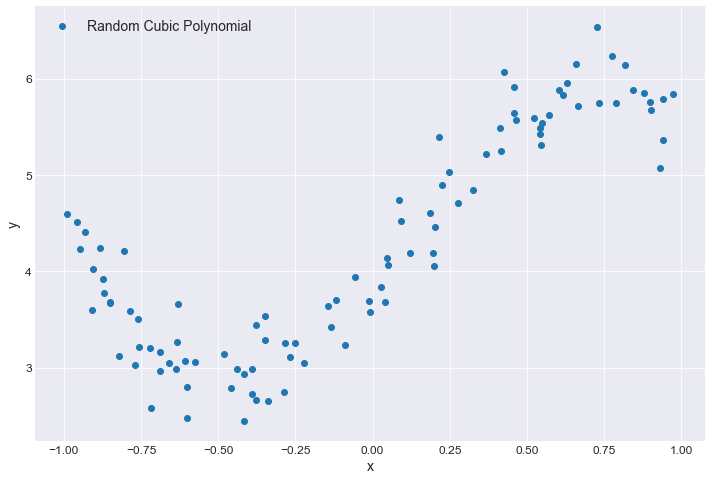

In [42]:
# create a basic scatter plot visualization of your cubic data set here
plt.scatter(x,y,label='Random Cubic Polynomial')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

### Fit a Linear Regression

In the next cell(s) find a best fit linear regression (line) to the artificial cubic data.  You can choose which library
or method to fit your data (scikit-learn, statsmodel, np.polyfit).  But do report the following:

1. Report the intercept and slope coefficients of your fitted line.  Whatever method you use, you should get the following slope and intercept values:
  - intercept: 4.3575
  - slope: 1.5648
2. Make a plot of your noisy data with your fitted model line drawn with the data.
3. Find and report the $R^2$ measure, which is the goodness of the linear regression fit to the given data.

Intercept:  4.35748502535137
Slope:  1.564794922915841
R2 Score:  0.656431397391207


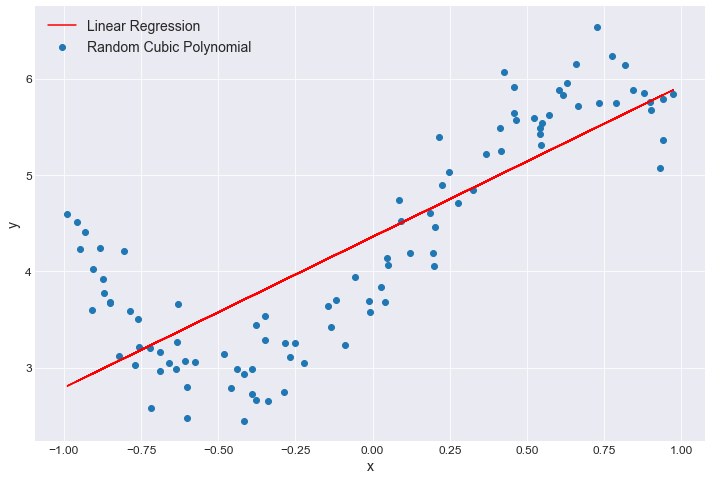

In [43]:
# 0. Create the linear regression model for the data
lin_reg = Pipeline(steps=[('lin_reg',LinearRegression())])
x1 = x.reshape(-1,1)
y1 = y.reshape(-1,1) 
lin_reg.fit(x1,y1)
# 1. report the intercept and slope
print('Intercept: ',lin_reg[0].intercept_[0])
print('Slope: ',lin_reg[0].coef_[0][0])
# 2. Make a scatter plot with the fitted regression line model
plt.scatter(x1,y1,label='Random Cubic Polynomial')
plt.plot(x1,lin_reg.predict(x1),label='Linear Regression',color='r')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
# 3. report R^2 fit
print('R2 Score: ',r2_score(y1,lin_reg.predict(x1)))

### Fit a 5th Order Regression

As you know this artificial function is actually a cubic function with some random noise in
the data mapping x to the dependent variable y.  If we knew or suspected this was a cubic
funciton, we could fit a cubic funciton to the data and see how good our fit is.

For example, here I will just show you the result of using `np.polyfit` to fit a 3rd order (cubic)
polynomial to our noisy data.

```python
theta = np.polyfit(x, y, 3) # fit a degree 3 (cubic) polynomial to the data

# 1. report the intercept and slope
print(theta)
>>> [-3.15173418  1.18723786  3.52544514  3.92884488]
```

In [44]:
theta = np.polyfit(x, y, 3) # fit a degree 3 (cubic) polynomial to the data

#1. report the intercept and slope
print(theta)

[-3.15173418  1.18723786  3.52544514  3.92884488]


The highest order (3rd power or cubic) term is the first one, down to the lowest order (the intercept) term from
the `polyfit` function.  Thus this result corresponds to a fitted function of:

\begin{equation}
y = -3.15 x^3  + 1.18 x ^2 + 3.52 x + 3.92
\end{equation}

You should compare that to the actual function we used to generate the function, which was once again:

\begin{equation}
y = -3x^3 + 1x^2 + 3.5x + 4
\end{equation}

The fit will not be perfect because of the noise, but you can see that it does a pretty good job.

Usually however you don't know the shape or order of the underlying function that controls your data.
In the next cell(s) use the `PolynomialFeatures` function from `scikit-learn` to generate
all combinations of features for a `degree=5` polynomial features.  Since
you generated the data using a known seed, your resulting set of features should have the following
as its first 5 rows of sample values:

```python
# The shape should be (100,5) after transforming to add the higher order polynomial features, and the first 5
# samples should look like the following
print(X_5d.shape)
>>> (100, 5)

print(X_5d[:5,:])
>>> [[-0.25091976  0.06296073 -0.01579809  0.00396405 -0.00099466]
     [ 0.90142861  0.81257354  0.73247704  0.66027576  0.59519147]
     [ 0.46398788  0.21528476  0.09988952  0.04634753  0.02150469]
     [ 0.19731697  0.03893399  0.00768234  0.00151586  0.0002991 ]
     [-0.68796272  0.4732927  -0.32560773  0.22400598 -0.15410776]]
```

In [45]:
# Use PolynomialFeatures to generate a 5th order set of polynomial features of the original data
X_5d = PolynomialFeatures(degree=5,include_bias=False).fit_transform(x1)
# The shape should be (100,4) after transforming to add the higher order polynomial features, and the first 5
# samples should look like the following
print(X_5d.shape)
print(X_5d[:5,:])

(100, 5)
[[-0.25091976  0.06296073 -0.01579809  0.00396405 -0.00099466]
 [ 0.90142861  0.81257354  0.73247704  0.66027576  0.59519147]
 [ 0.46398788  0.21528476  0.09988952  0.04634753  0.02150469]
 [ 0.19731697  0.03893399  0.00768234  0.00151586  0.0002991 ]
 [-0.68796272  0.4732927  -0.32560773  0.22400598 -0.15410776]]


Given this set of features, use `scikit-learn` `LinearRegression` object to fit a regressor to this expanded set of
features, and report the coefficients you end up finding for your fit.  As before
report your intercept and coefficients, and the R^2 fit score of this regression.

In [46]:
# fit a new linear regression to the expanded feature matrix
poly_reg = Pipeline(steps=[('poly',PolynomialFeatures(degree=5,include_bias=False)),('lin_reg',LinearRegression())])
poly_reg.fit(x1,y1)
# 1. report the intercept and slope and R^2
print('Intecept: ',poly_reg[1].intercept_[0])
print('Coefficients: ',poly_reg[1].coef_[0])
print('R2 Score: ',r2_score(y1,poly_reg.predict(x1)))

Intecept:  3.8888355819980713
Coefficients:  [ 3.43529381  1.57231888 -2.70260617 -0.44785037 -0.42024375]
R2 Score:  0.9365664086432218


Here you should find that intercept corresponds to the bias or intercept term.  The coefficients are arranged
in the reverse order, from the lowest to the highest, so the coefficient at index 0 is the $x^1$ term, and the
last coefficient returned from the model is the $x^5$ term.  You should find that the $x^5$ term is the smallest,
but it is not 0, even though we know the actual function is a cubic.  This is because, again, the noise we
add makes it impossible to recover the original function governing this data.

We can plot this hypothesized fit to the original noisy data using the `predict()` method of the 
`scikit-learn` fitted instance.  In the next cell, create a scatter plot of the original noisy data,
then use the `predict()` function to show the fitted quadratic polynomial to the data.
Also plot the true function on your plot as well.  You should end up with a figure that
looks like the following:

![Fit of 5th order polynomial to cubic data](test-01-q1fig.png)


Text(0, 0.5, 'y')

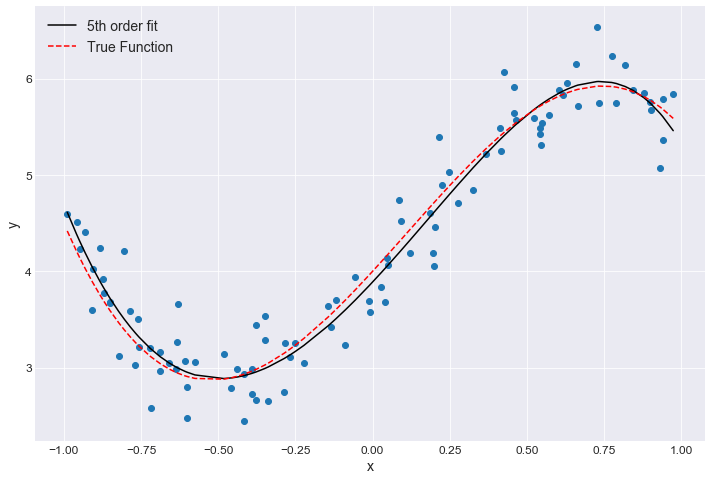

In [47]:
# create scatter plot here
plt.scatter(x1,y1)
df_x1 = pd.DataFrame(x1,columns=['x']).sort_values('x')
y_hat = poly_reg.predict(df_x1)
# show the model fit funciton
plt.plot(df_x1,y_hat,color='black',label='5th order fit')

# compare to the true function by using the data with no noise we generated previously
df_x1 = pd.DataFrame(x1,columns=['x'])
df_y_original = pd.DataFrame(f_cube,columns=['y'])
original_data = pd.concat([df_x1,df_y_original],axis=1).sort_values('x')
plt.plot(original_data.x,original_data.y,label='True Function',Linestyle='--',color='Red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

### Regularization of Polynomial Regression

As we did in assignments for this class and in our lecture notebooks, demonstrate
fitting a model using regularization this time.  It is tough (impossible?) to find
regularization that will eliminate the $x^4$ and $x^5$ feature coefficients, and still
get a good fit of the data.  But demonstrate using either `Lasso`, `Ridge` or 
`ElasticNet` regression.  And see if you can find regularization parameters
(`alpha` and also `l1_ratio` if using `ElasticNet`) that at least eliminates one
of the features (like the $x^4$ feature), while still getting about the same $R^2$
fit score you obtained with no regularization.

As you did before, report your intercept, coefficients and $R^2$ fit score.  And also
once again plot your model against the true function as a visualization.

In [48]:
# fit a new linear regression to the expanded feature matrix
lasso_reg = Pipeline(steps=[('poly',PolynomialFeatures(degree=5,include_bias=False)),('lasso',Lasso(alpha=0.002))])
lasso_reg.fit(x1,y1)
# 1. report the intercept and slope
print('Intecept: ',lasso_reg[1].intercept_[0])
print('Coefficients: ',lasso_reg[1].coef_)
print('R2 Score: ',r2_score(y1,lasso_reg.predict(x1)))

Intecept:  3.9368111893869235
Coefficients:  [ 3.22942019  1.16945919 -2.05734776 -0.         -0.86701127]
R2 Score:  0.9350663793230045


Text(0, 0.5, 'y')

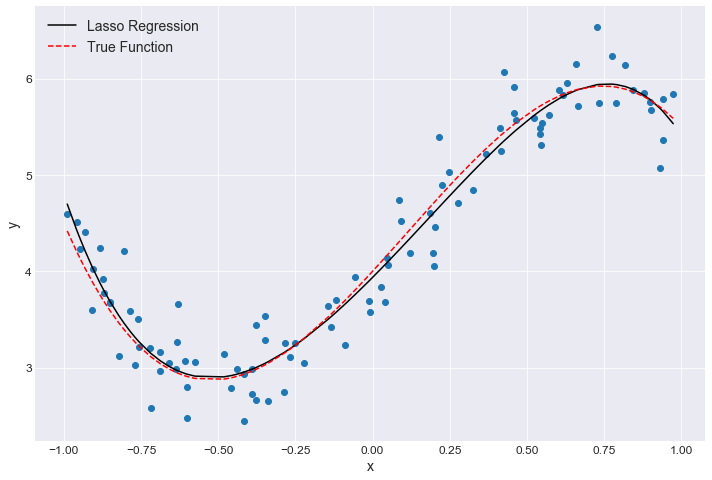

In [49]:
# create scatter plot here
plt.scatter(x1,y1)
df_x1 = pd.DataFrame(x1,columns=['x']).sort_values('x')
y_hat = lasso_reg.predict(df_x1)
plt.plot(df_x1,y_hat,color='black',label='Lasso Regression')
# compare to the true function by using the data with no noise we generated previously
plt.plot(original_data.x,original_data.y,label='True Function',Linestyle='--',color='Red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

## Question 2: Logistic Classification

In this section you will generate another artificial data set that contains 4 labels/classes.  This time, however,
we will use one of the `scikit-learn` dataset generator methods to generate the data set for us.  You will
then fit a logistic regression classifier to the data (and we will also use the same data to fit an SVM
classifier as well to it for comparison).  

### Artifical Multiclass Dataset

As mentioned previously there are many functions in the `sklearn.datasets` that can be used to 
[generate artificial datasets](https://scikit-learn.org/stable/datasets/index.html#generated-datasets)
in order to test out various machine learning methods.  The simplest one for generating
labeled datasets suitable for classification tasks is the `make_blobs` dataset generator.

In the next cell, import `make_blobs` and generate an artificial dataset with 4 categories or
labels.  You will need to read the documentation for the function to determine the parameters
you need.  Make a dataset with 500 samples and 2 features.  You will need to specify 4 as the
number of centers of the generated blobs, in order to generate data with 4 categories.  Use
a cluster standard deviation of 3.0.  The random seed has been reset to 42 in the cell before where
you should call `make_blobs`, so that you will get the same results when you generate you multiclass
dataset.

In [50]:
# import the make_blobs function, and make sure we reset the random seed to 42 so
# that you get the expected results when generating your dataset
from sklearn.datasets import make_blobs


In [51]:
# generate your multiclass dataset with 4 classes.  There should be 500 samples in the dataset with 2
# input features.  Use a standard deviation of 3.0 for the cluster centers
np.random.seed(42)
X,y = make_blobs(n_samples=500,n_features=2,centers=4,cluster_std=3.0)


If you correctly create your dataset, then you should have an X feature matrix of size (500,2) and a
y label vector with (500,) labels.  The labels will be the values [0 1 2 3] for this artificial
multiclass dataset.  The first few items of the X inputs and the Y labels should be as shown:

```python
print(X.shape)
>>> (500, 2)

print(y.shape)
>>> (500,)

print(np.unique(y))
>>> [0 1 2 3]

print(X[:5])
>>> [[ -5.39050778   5.21399364]
     [-14.97028712  -7.04299419]
     [ 11.20928764  -0.45172517]
     [ -3.68552208   4.62374128]
     [ -3.27598542  -8.10433571]]

print(y[:5])
>>> [3 2 1 0 2]

```

In [52]:
# see if you did it correctly by displaying the following 
print(X.shape)
print(y.shape)
print(np.unique(y))

print(X[:5])
print(y[:5])

(500, 2)
(500,)
[0 1 2 3]
[[ -5.39050778   5.21399364]
 [-14.97028712  -7.04299419]
 [ 11.20928764  -0.45172517]
 [ -3.68552208   4.62374128]
 [ -3.27598542  -8.10433571]]
[3 2 1 0 2]


In the next cell create a scatter plot of the artifical data set and use markers or colors to indicate
the classes of the 4 data points.  You can use similar methods as we have shown previously in class lecture
notebooks, but you need to extend the concept to display the 4 categories.

Your figure details can differ, but it should look something like the following figure.

![Scatter Plot of Multi-Class dataset](test-01-q2fig.png)


Text(0.5, 0, 'Feature 1')

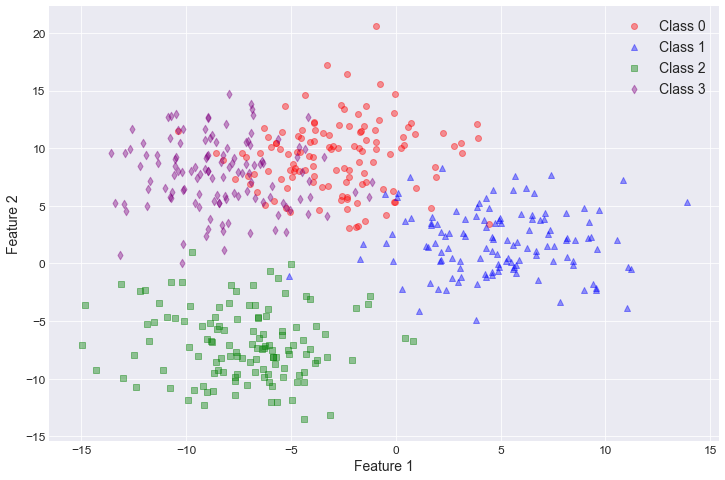

In [53]:
# create a scatter plot of the artificial multiclass dataset
plt.scatter(X[y==0,0],X[y==0,1],color='red',marker='o',label='Class 0',alpha=0.4)
plt.scatter(X[y==1,0],X[y==1,1],color='blue',marker='^',label='Class 1',alpha=0.4)
plt.scatter(X[y==2,0],X[y==2,1],color='green',marker='s',label='Class 2',alpha=0.4)
plt.scatter(X[y==3,0],X[y==3,1],color='purple',marker='d',label='Class 3',alpha=0.4)
plt.legend()
plt.ylabel('Feature 2')
plt.xlabel('Feature 1')

For this classification you are going to evaluate the goodness of the model fit by doing a train/test
split and evaluating the classification performance on the test data.  In the next cell, create X_train, X_test,
y_train and y_test arrays from your artificial multiclass dataset, using a 75%/25% train/test split.  You should
use the `scikit-learn` methods for splitting the data here that we have shown examples of and used in previous
assignments and lectures.  Use a random_state of 42 to make sure that you split the data in the same way
every time.

If you use a 75/25 split, you should end up with 375 samples in the training data, and 125 in the testing data:

```python
print(X_train.shape)
>>> (375, 2)

print(X_test.shape)
>>> (125, 2)

print(y_train.shape)
>>> (375,)

print(y_test.shape)
>>> (125,)
```

In [54]:
# perform a 75/25 percent train/test split of the artificial multiclass data here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 2)
(125, 2)
(375,)
(125,)


### Fit a Multiclass Logistic Classifier

In this section you should fit/train a multiclass logistic regression instance using `scikit-learn`
`LogisticRegression` on your training data.  I will not tell you the exact parameters to use.
Try and see in the next part if you can tweak the parameters to get good performance on the
test data.  Try comparing using multi_class='multinomial' vs. multi_class='ovr' (one vs. rest).

In the next cell, fit your model to the training data only.

In [55]:
# Create a LinearRegression instance and 
# fit a Linear Regression classification to the training data 
log_reg_mult = Pipeline(steps=[('log_reg',LogisticRegression(multi_class='multinomial', solver="lbfgs", C=10))])
log_reg_mult.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('log_reg',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='multinomial', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

Using the model you just fit, show the predictation accuracy on the training data, and then on the
held back test data, for your fitted model. (**Hint**: recall the score method for
`scikit-learn` model instances)

In [56]:
# show the prediction accuracy on the training data
print('Train set accuracy: ',log_reg_mult.score(X_train,y_train))

Train set accuracy:  0.912


In [57]:
# now show the predictation accuracy for your model on the held back test data
print('Test set accuracy: ',log_reg_mult.score(X_test,y_test))

Test set accuracy:  0.896


You should be able to get an accuracy of about 0.91 on the training data, and 0.89 on the test data most of the
time if your regression is fitting correctly.

Now in the next cell, display the confusion matrices on the trained data and on the test data for
your logistic classifier.

In [58]:
# training data confusion matrix
y_pred = log_reg_mult.predict(X_train)
pred_labels = ['pred 0','pred 1','pred 2','pred 3']
true_labels = ['true 0','true 1','true 2','true 3']
cm = pd.DataFrame(confusion_matrix(y_train,y_pred),columns=pred_labels,index=true_labels)
print('Training set confusion matrix:')
print(confusion_matrix(y_train,y_pred))
cm

Training set confusion matrix:
[[83  2  0 12]
 [ 3 90  1  0]
 [ 0  0 96  1]
 [14  0  0 73]]


,pred 0,pred 1,pred 2,pred 3
true 0,83,2,0,12
true 1,3,90,1,0
true 2,0,0,96,1
true 3,14,0,0,73


In [59]:
# test data confusion matrix
y_pred = log_reg_mult.predict(X_test)
pred_labels = ['pred 0','pred 1','pred 2','pred 3']
true_labels = ['true 0','true 1','true 2','true 3']
cm = pd.DataFrame(confusion_matrix(y_test,y_pred),columns=pred_labels,index=true_labels)
print('Test set confusion matrix:')
print(confusion_matrix(y_test,y_pred))
cm

Test set confusion matrix:
[[23  1  0  4]
 [ 2 29  0  0]
 [ 0  0 28  0]
 [ 6  0  0 32]]


,pred 0,pred 1,pred 2,pred 3
true 0,23,1,0,4
true 1,2,29,0,0
true 2,0,0,28,0
true 3,6,0,0,32


### Visualize Decision Boundaries

Using examples from class and your fitted logistic regression, visualize
the decision boundaries that were learned by your multi-class logistic
regression.  You may want to use countour maps for this visualization.
Your figure should look similar (though it doesn't have to exactly
reproduce) to the following example of the learned decision boundaires:

![Multi-class Dataset Decision Boundaries](test-01-q2fig2.png)


So try and visualize the decision boundary
of your fitted logistic classifier here.  Since this is a multiclass classifier, it is somewhat difficult to find the
decision boundary lines for each of the individual classifiers being used.  So the easiest approach is to use
the `predict()` method form a mesh/grid of prediction values covering the 2 features, and make a contour plot
of the resulting areas. I have given examples of doing this before, but again you would need to expand this
for the multiclass case of 4 classes here.  You should see that, since this is a basic logistic regression, 
linear decision boundaries are being fitted by the model as best they can to make the classification decisions
for the fitted model.

Put your visualization in the next cell of the fitted decision boundaries of your classifier.

In [60]:
# visualize the decision boundaries for your logistic regression here
x0, x1 = np.meshgrid(
        np.linspace(-15, 15, 500).reshape(-1, 1),
        np.linspace(-15, 22, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new

array([[-15.        , -15.        ],
       [-14.93987976, -15.        ],
       [-14.87975952, -15.        ],
       ...,
       [ 14.87975952,  22.        ],
       [ 14.93987976,  22.        ],
       [ 15.        ,  22.        ]])

In [61]:
y_predict = log_reg_mult.predict(X_new)

Text(0.5, 0, 'Feature 1')

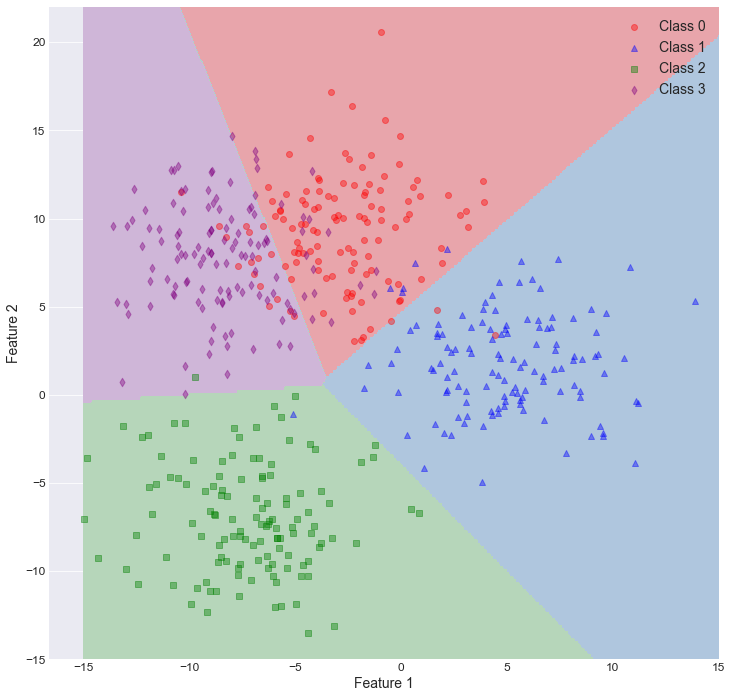

In [62]:
plt.figure(figsize=(12, 12))
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(['#e8a5ab','#afc6de','#b6d6ba','#cfb6d8'])
plt.contourf(x0, x1, zz,cmap=custom_cmap)
plt.scatter(X[y==0,0],X[y==0,1],color='red',marker='o',label='Class 0',alpha=0.4)
plt.scatter(X[y==1,0],X[y==1,1],color='blue',marker='^',label='Class 1',alpha=0.4)
plt.scatter(X[y==2,0],X[y==2,1],color='green',marker='s',label='Class 2',alpha=0.4)
plt.scatter(X[y==3,0],X[y==3,1],color='purple',marker='d',label='Class 3',alpha=0.4)
plt.legend()
plt.ylabel('Feature 2')
plt.xlabel('Feature 1')